In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
print(f"Versão do TensorFlow: {tf.__version__}")

Versão do TensorFlow: 2.18.0


In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f"Shape das imagens de treinamento: {train_images.shape}")
print(f"Número de etiquetas de treinamento: {len(train_labels)}")
print(f"Shape das imagens de teste: {test_images.shape}")
print(f"Número de etiquetas de teste: {len(test_labels)}")

Shape das imagens de treinamento: (60000, 28, 28)
Número de etiquetas de treinamento: 60000
Shape das imagens de teste: (10000, 28, 28)
Número de etiquetas de teste: 10000


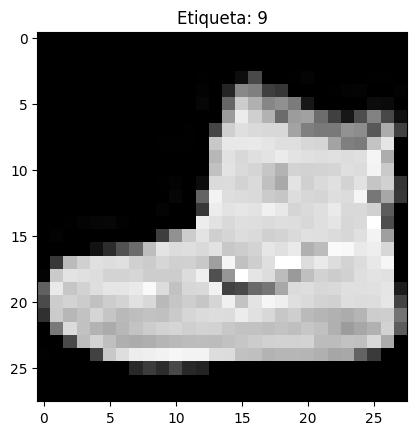

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(f"Etiqueta: {train_labels[0]}")
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
print(f"Shape das imagens de treinamento normalizadas: {train_images.shape}")

Shape das imagens de treinamento normalizadas: (60000, 28, 28)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10, validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7733 - loss: 0.6236 - val_accuracy: 0.8755 - val_loss: 0.3479
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.8871 - loss: 0.3126 - val_accuracy: 0.8858 - val_loss: 0.3142
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.9064 - loss: 0.2555 - val_accuracy: 0.8980 - val_loss: 0.2803
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9181 - loss: 0.2214 - val_accuracy: 0.9001 - val_loss: 0.2760
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9259 - loss: 0.1972 - val_accuracy: 0.9097 - val_loss: 0.2617
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9354 - loss: 0.1740 - val_accuracy: 0.9073 - val_loss: 0.2585
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9438 - loss: 0.1493 - val_accuracy: 0.9112 - val_loss: 0.2587
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.9500 -

In [14]:
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)

print(f'\nAcurácia nos dados de teste: {test_accuracy:.4f}')
print(f'Perda nos dados de teste: {test_loss:.4f}')

313/313 - 3s - 11ms/step - accuracy: 0.9098 - loss: 0.2951

Acurácia nos dados de teste: 0.9098
Perda nos dados de teste: 0.2951


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Probabilidades previstas: [[8.2079893e-08 5.4756481e-13 6.9562869e-11 1.5814154e-08 1.4504105e-12
  1.2000677e-09 3.3873258e-12 6.4011239e-08 3.7186302e-13 9.9999988e-01]]
Classe prevista: 9
Etiqueta real: 9


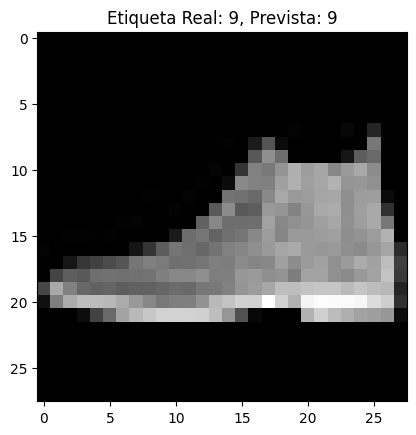

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Pega a primeira imagem do conjunto de teste
img = test_images[0]
img = np.expand_dims(img, axis=0) # Adiciona a dimensão do batch

# Faz a previsão
predictions = model.predict(img.reshape(-1, 28, 28, 1))

# A previsão é um array de probabilidades para cada classe
print(f"Probabilidades previstas: {predictions}")

# A classe com a maior probabilidade é a previsão final
predicted_class = np.argmax(predictions)
print(f"Classe prevista: {predicted_class}")

# Vamos ver a etiqueta real para comparar
print(f"Etiqueta real: {test_labels[0]}")

# Podemos também visualizar a imagem
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Etiqueta Real: {test_labels[0]}, Prevista: {predicted_class}")
plt.show()